# Simple Linear Regression

## Step 1 : Reading and Understanding the data 

Steps:
1. Importug data Using the pandas Library
2. Understanding the structure of the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#reading the data
advertising = pd.read_csv('advertising.csv')

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# To visualize the dataset, we need to import the required Libaries
import matplotlib.pyplot as plt
import seaborn as sns

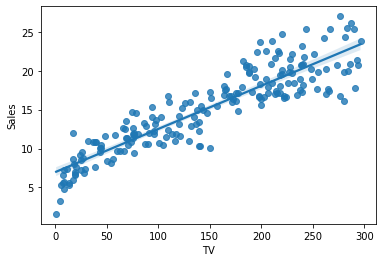

In [8]:
#Reg plot with TV vs Sales
sns.regplot(x='TV',y='Sales', data = advertising)
plt.show()

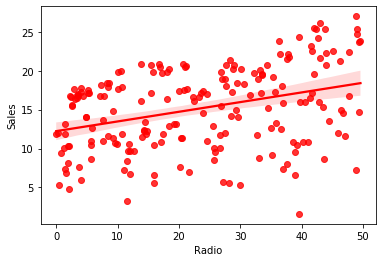

In [9]:
#Replot for Radio vs Sales
sns.regplot(x='Radio',y='Sales',data=advertising,color='red')
plt.show()

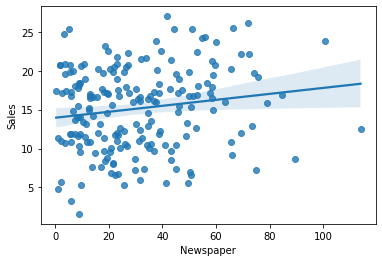

In [10]:
#Replot for Newspaper vs Sales
sns.regplot(x='Newspaper',y='Sales',data=advertising)
plt.show()

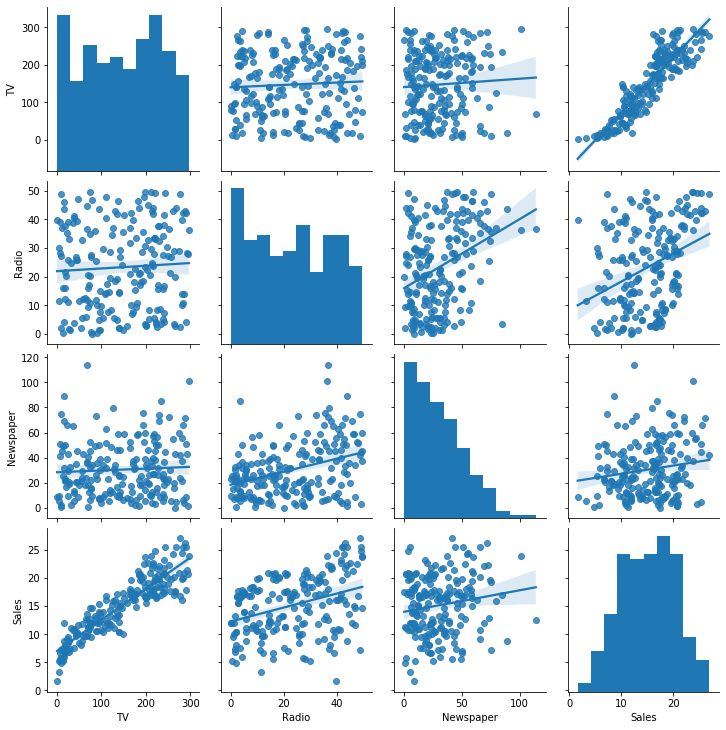

In [11]:
sns.pairplot(advertising, kind='reg')
plt.show()

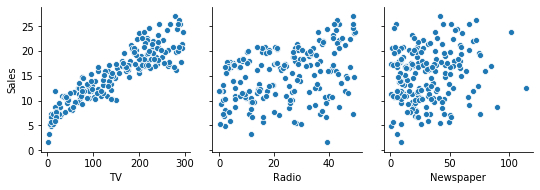

In [12]:
sns.pairplot(data=advertising,x_vars=['TV','Radio','Newspaper'], y_vars='Sales')
plt.show()

In [13]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


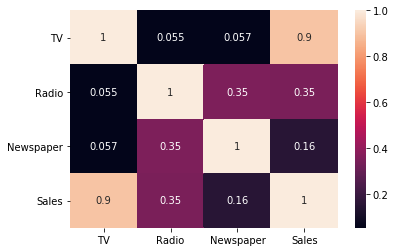

In [14]:
sns.heatmap(advertising.corr(),annot=True)
plt.show()

## Step 2:  Performing a Simple Linear Regression

$y= c+m_1x_1 + m_2x_2 +..m_nx_n$
- $y$ is the response
- $c$ is the intercept
- $m_1$ is the coefficient for the first feature
- $m_n$ is the coefficiet for the n'th feature

So for this case :

$y = c+m_1 \times TV $

The $m$ values are called the model **coefficents** or **model parameters**.

In [15]:
#importing stats models library
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

### Steps to build a Linear regression model in Python
 - Create X and y
 - Create train and test data sets (70-30, 80-20)
 - Train our model on the training sets (i.e, learn the coefficients)
 - Evaluate the model (training dataset, test dataset)

In [16]:
# create X and y
X = advertising['TV']
y = advertising['Sales']

In [17]:
# train and test split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [18]:
y_train.shape

(140,)

In [19]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [20]:
#Training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [21]:
# Fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [22]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

When can now assume

$Sales = 6.94 +0.05 \times TV$

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           1.52e-52
Time:                        02:09:15   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary
1. Coeff and p-value
2. R-squared is 81.6%, which is very high
3. p(F-Statistic) is low => the fit is not by chance

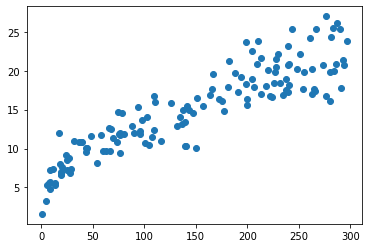

In [24]:
plt.scatter(X_train,y_train)
plt.show()

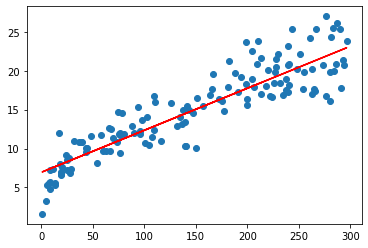

In [25]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

## Step 3 : Residual Analysis

In [26]:
#error = f(y_train,y_train_pred)

In [27]:
y_train_pred = lr_model.predict(X_train_sm)

In [28]:
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

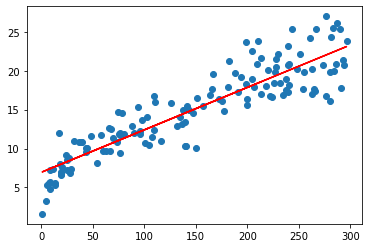

In [29]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')
plt.show()

In [30]:
res = y_train - y_train_pred

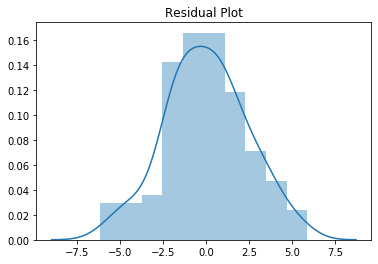

In [31]:
#plot the residuals 
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

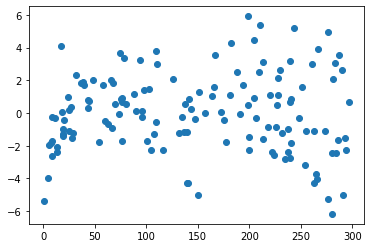

In [32]:
#look for patterns in residuals  (We should not be able to identify any)

plt.scatter(X_train,res)
plt.show()

### Step 4 : Predictions and Evaluating on the test dataset

In [33]:
# Predictions on the test dataset (y_test_pred)
# Evaluate the model, r-squared, on the test.

In [34]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
#r-squared
r2 = r2_score(y_true=y_test, y_pred = y_test_pred)

In [37]:
r2

0.7921031601245658

In [38]:
#Comparing r2 with train
r2_score(y_true = y_train, y_pred = y_train_pred)
r2

0.7921031601245658

In [39]:
#mean squared error
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826956

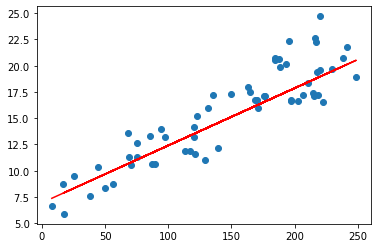

In [40]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

## Linear Regression Using sklearn

In [41]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.70, random_state=100)

In [44]:
from sklearn.linear_model import LinearRegression

In [47]:
X_train.shape

(140,)

In [49]:
#reshape X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [51]:
#### Steps in sklearn model building

#1. Create an object of linear regression
lm = LinearRegression()
#2. Fit the model
lm.fit(X_train_lm,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#3. See the params, make predictions (train,test)
print(lm.coef_)
print(lm.intercept_)


[0.05454575]
6.948683200001357


In [56]:
#make predictios 

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [59]:
# 4.Evaluate the model
print(r2_score(y_true = y_train,y_pred= y_train_pred))
print(r2_score(y_true =  y_test,y_pred = y_test_pred))

0.8157933136480389
0.7921031601245662
